# ChemicalX: A Deep Learning Library for Drug Pair Scoring
**Author:** Daniel Ardila


CSCI E-104 Advanced Deep Learning, 2024

Harvard University Extension School

Prof. Zoran B. Djordjević


## Table of Contents
- [Introduction](#introduction)
- 1. [Problem Statement](#problem-statement)
- 2. [DrugCombDB Overview](#drugcombdb)
    - 2.1. [Exploring Context Features](#contextF)
    - 2.2. [Exploring Drug Features](#drugF)
    - 2.3. [Exploring Labeled Triples](#triples)
- 3. [Extracting Drug Name and SMILES](#drugNandSmiles)
    - 3.1. [Visualizing Molecules](#visual)
- 4. [DeepSynergy Model Training and Evaluation Framework](#training)
    - 4.1. [Setting up Data for Model Training](#settingup)
    - 4.2. [Model Training](#modeltraining)
    - 4.3. [Model Evaluation and Prediction Collection](#eval)
    - 4.4. [Conclusion of Model Evaluation](#4conclusion)
- 5. [Integrating and Comparing ChemicalX Pipelines with Manual Pipelines](#5pipelines)
    - 5.1. [Manual pipelines](#5.1pipelines)
    - 5.2. [Conclusion on pipelines](#5.2pipelines)
- 6. [Comparative Analysis of Different Models](#6compa)
    - 6.1. [Neural Network Architectures](#6.1compa)
    - 6.2. [Model Training Loss and ROC_AUC](#6.2compa)
    - 6.3. [Model Training Loss and ROC_AUC](#6.3compa)
    - 6.4. [Saving the best model](#6.4compa)
    - 6.5. [Conclusion of Comparison](#6.5compa)
- 7. [Practical Application: Case Study in Cancer Drug Interactions](#7app)
    - 7.1. [Integrating Drug Names and Molecular Structures](#7.1app)
    - 7.2. [Model Testing Introduction](#7.2app)
    - 7.3. [Prediction Test](#7.3app)
- 8. [Other functionalities with ChemicalX](#8func)
- 9. [Summary](#9summary)


## Introduction <a name="introduction"></a>
Drug-drug interactions (DDIs) are a significant challenge in pharmacology due to the complexity of drug combinations and their potential effects. Predicting these interactions accurately is essential for identifying beneficial drug pairs while minimizing adverse effects. This project leverages ChemicalX, a deep learning library, to score drug pairs and predict potential interactions using existing datasets like DrugComb.


## 1. Problem Statement <a name="problem-statement"></a>
The primary objective is to use ChemicalX's state-of-the-art models to predict and score drug pairs based on their interaction effects. This approach aims to identify synergistic drug combinations that enhance treatment efficacy and prevent adverse interactions.


## 2. Loading Data from DrugCombDB <a name="drugcombdb"></a>

In this section of the notebook, we load various types of data from the `DrugCombDB`:

- **Context Features**: These are features related to the experimental settings under which the drug pair interactions were observed, such as cell lines used in experiments. Context features can play a crucial role in interpreting the drug interactions because the efficacy of drug pairs can vary across different biological contexts.

- **Drug Features**: This includes features directly related to the chemical and physical properties of the drugs. Drug features typically encompass molecular descriptors or other properties that describe how a drug might interact with biological targets or other drugs.

- **Labeled Triples**: These are the core data points for our study. Each "triple" consists of a pair of drugs and a label indicating their interaction, such as a synergy score. These labels are essential for training models that predict how effective or detrimental a drug combination might be.

Each of these datasets is crucial for building a comprehensive model in ChemicalX, which can predict outcomes of drug combinations effectively.


In [327]:
import matplotlib.pyplot as plt
import pandas as pd
import chemicalx

In [25]:
%matplotlib inline 

In [3]:
# Import the DrugCombDB class from the chemicalx.data module
from chemicalx.data import DrugCombDB,BatchGenerator

# Instantiate the DrugCombDB object to access the DrugComb database functionalities
loader_drugcomb = DrugCombDB()

C:\Users\danie\.conda\envs\py_chemicalX_VF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### To see the functions or methods associated to "DrugCombDB" use the following line of code

In [5]:
dir(loader_drugcomb)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'base_url',
 'context_channels',
 'dataset_name',
 'drug_channels',
 'generate_path',
 'get_context_features',
 'get_drug_features',
 'get_generator',
 'get_generators',
 'get_labeled_triples',
 'load_raw_csv_data',
 'load_raw_json_data',
 'num_contexts',
 'num_drugs',
 'num_labeled_triples',
 'summarize']

To see the number of records for each dataset in DrugComb, run the next line

In [6]:
loader_drugcomb.summarize()

Name: DrugCombDB
Contexts: 112
Context Feature Size: 112
Drugs: 2956
Drug Feature Size: 256
Triples: 191391



- **Contexts**: 112 unique biological contexts
- **Context Feature Size**: Each context is characterized by 112 features
- **Drugs**: The dataset contains 2956 unique drugs
- **Drug Feature Size**: Each drug is represented by 256 features
- **Triples**: There are 191,391 triples in the dataset, each representing a unique combination of drug-context interactions


In [7]:
# Retrieve context features from the database, such as cell line information
context_set = loader_drugcomb.get_context_features()

# Retrieve drug features from the database, such as molecular descriptors
drug_set = loader_drugcomb.get_drug_features()

# Retrieve labeled triples, i.e., pairs of drugs and their interaction labels (e.g., synergy scores)
triples = loader_drugcomb.get_labeled_triples()


## 2.1. Exploring Context Features <a name="contextF"></a>

The `context_set` in our dataset is not structured as a typical DataFrame but rather as a dictionary where each key is a context identifier (e.g., a specific cell line name) and the value is a tensor representing certain features of that context.

### Understanding the Structure

Each entry in `context_set` represents:
- **Context Name**: This is the identifier for the context, typically denoting different experimental conditions or cell line environments under which drug interactions were tested.
- **Tensor Values**: These are the features encoded as tensors. Each tensor might represent a vector of features that describe the context in a format suitable for input into machine learning models.

We display the first few entries of this dataset to get a sense of its composition and to confirm that the data loading has been executed correctly. This preview helps us ensure that the tensor dimensions and values are as expected before we proceed with more complex data manipulation or model training tasks.

In [8]:
# Displaying a sample from the context features to understand their structure
print("Context Features Sample:")
for context_name, tensor_values in list(context_set.items())[:5]:  # Displaying the first 3 entries for brevity
    print(f"Context Name: {context_name}")
    print(f"Tensor Values: {tensor_values}")
    print("------")

Context Features Sample:
Context Name: RXF 393
Tensor Values: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])
------
Context Name: HS 578T
Tensor Values: tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [9]:
context_set.data.keys()

dict_keys(['RXF 393', 'HS 578T', 'SK-MEL-5', 'UO-31', 'UWB1289', 'T-47D', 'MDAMB436', 'U-HO1', 'UACC-257', 'SK-OV-3', 'HCT-15', 'JHH-520', 'ES2', 'EW-8', 'MALME-3M', 'LOVO', 'NCIH1650', 'MDA-MB-435', 'SK-MEL-28', 'PC-3', 'UWB1289+BRCA1', 'JHH-136', 'NCI-H226', 'COLO 205', 'VCAP', 'PA1', 'MDA-MB-468', 'TMD8', 'HOP-62', 'A375', 'RD', 'DU-145', '786-0', 'OVCAR-8', 'OVCAR-5', 'SF-539', 'SW-620', 'K-562', 'KM12', 'IGROV1', 'ZR751', 'RPMI-8226', 'SK-MEL-2', 'KBM-7', 'L-1236', 'OVCAR3', 'NCI-H322M', 'NCI-H522', 'U251', 'KPL1', 'HOP-92', 'NCI-ADR-RES', 'MDA-MB-231', 'SF-268', 'TK-10', 'A2058', 'MOLT-4', 'CAKI-1', 'CAOV3', 'OV90', '3D7', 'MCF7', 'SR', 'HCC-2998', 'T98G', 'DD2', 'HDLM-2', 'Rh36', 'OVCAR-4', 'RPMI7951', 'HCT116', 'NCIH520', 'LOX IMVI', 'CCRF-CEM', 'CTR', 'SF-295', 'EFM192B', 'SKMEL30', 'HT29', 'A549', 'EKVX', 'COLO320DM', 'DIPG25', 'A-673', 'HT144', 'M14', 'TC-32', 'SW837', 'MSTO', 'BT-549', 'SU-DIPG-XIII', 'RKO', 'SKMES1', 'A2780', 'NCI-H460', 'NCIH23', 'NCIH2122', 'TC-71', 'SNB

## 2.2. Exploring Drug Features <a name="drugF"></a>

The `drug_set` in our dataset is a dictionary where each key is a unique drug identifier and each value is a dictionary containing the drug's features and molecular structure information. This structured approach allows easy access to specific details for each drug.

### Understanding the Structure

Each entry in `drug_set` includes:
- **Drug ID**: The unique identifier for each drug.
- **Features**: A tensor representing various chemical properties or descriptors of the drug. These features are essential for machine learning models to learn how different properties influence drug interactions.
- **Molecule Details**:
  - **Number of Atoms**: Indicates the complexity of the molecular structure.
  - **Number of Bonds**: Reflects how atoms are connected in the molecule, which can affect the drug's pharmacological activity.

By exploring these datasets, we gain insights into the chemical characteristics of each drug, which will be crucial for subsequent modeling steps. The initial exploration helps confirm that the data is loaded correctly and gives an idea of the data's nature before deeper analysis and modeling.


In [10]:
# Displaying a sample from the drug features to understand their structure
print("Drug Features Sample:")
for drug_id, drug_info in list(drug_set.items())[:3]:  # Displaying the first 3 entries for brevity
    print(f"Drug ID: {drug_id}")
    print("Features:")
    print(drug_info['features'])
    print("Molecule Details:")
    print(f"Number of Atoms: {drug_info['molecule'].num_atom}")
    print(f"Number of Bonds: {drug_info['molecule'].num_bond}")
    print("------")

molecules_info = drug_set.get_molecules(["65628"])
print("Molecules information:", molecules_info)


Drug Features Sample:
Drug ID: 65628
Features:
tensor([[1., 0., 0., 1., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 1., 0., 0., 0., 0., 0., 0., 7., 3., 0., 0., 0., 2., 1., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
         0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0

## 2.3. Exploring Labeled Triples <a name="triples"></a>

The `LabeledTriples` in our dataset is a structured representation of drug pair interactions, crucial for analyzing and predicting the efficacy of drug combinations. This dataset component is implemented as a wrapper around a pandas DataFrame, facilitating the management and manipulation of interaction data.

### Understanding the Structure

Each entry in `LabeledTriples` includes:
- **Drug Pair**: Identifiers for the two drugs involved in the interaction.
- **Context**: A particular cell line.
- **Context Specific Label**: A label, often a synergy score, associated with each drug pair, specific to the experimental context (e.g., a particular cell line).



In [11]:
# Check available methods and attributes in the LabeledTriples class
print("Available methods and attributes in LabeledTriples:")
print(dir(triples))

Available methods and attributes in LabeledTriples:
['__add__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'columns', 'data', 'drop_duplicates', 'dtype', 'get_combination_count', 'get_context_count', 'get_drug_count', 'get_labeled_triple_count', 'get_negative_count', 'get_negative_rate', 'get_positive_count', 'get_positive_rate', 'train_test_split']


- The method `data` allow us to extract the data and convert it into a dataframe. 
- The method `train_test_split` allow us to split the data into train/test. 

In [15]:
triples_df = pd.DataFrame(triples.data)
print("Labeled Triples DataFrame:")
print(triples_df.head())

print("\nBasic Descriptive Statistics:")
print(triples_df.describe())

Labeled Triples DataFrame:
  drug_1    drug_2 context  label
0   3385  11960529   A2058    1.0
1   3385  24856436   A2058    1.0
2   3385  11977753   A2058    1.0
3   3385    387447   A2058    0.0
4   3385   3062316   A2058    1.0

Basic Descriptive Statistics:
               label
count  191391.000000
mean        0.293258
std         0.455257
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [16]:
# Using the train_test_split method to split the data
# Here we specify the train_size and use the default random_state
train_set, test_set = triples.train_test_split(train_size=0.8, random_state=42)
print("\nTraining Set Sample:")
print(train_set.data.head())  # Assuming that train_set also has a 'data' attribute
print("\nTest Set Sample:")
print(test_set.data.head())   # Assuming that test_set also has a 'data' attribute




Training Set Sample:
          drug_1   drug_2    context  label
147626    123631   457193       ACHN    1.0
40359     447043   115355      KBM-7    1.0
74212      36314   123608       HT29    0.0
185454  54600319    32874  RPMI-8226    1.0
57367     667490  6445540   LOX IMVI    0.0

Test Set Sample:
           drug_1  drug_2      context  label
173177       3385    5746       CAKI-1    1.0
123043    9927978    2662       SNB-75    0.0
134956      60198  148124  NCI-ADR-RES    1.0
135744  135410875  667490        K-562    0.0
190759   11676786    5394         T98G    1.0


Note how drug_1 and drug_2 each have an associated ID. This ID can be used to identify the drug name.

##  3. Extracting Drug Name and SMILES <a name="drugNandSmiles"></a>

We'll develop a function to query the PubChem database to fetch important chemical information about drugs. Specifically, we aim to retrieve the drug's IUPAC name, its common title, and the canonical SMILES notation. SMILES (Simplified Molecular Input Line Entry System) is a notation that allows a user to represent a chemical structure in a way that can be used by the computer for broader analytical purposes. Here's how we implement this:


In [171]:
import requests


def get_drug_smiles_and_title_from_pubchem(cid):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
    url = f"{base_url}/compound/cid/{cid}/property/Title,CanonicalSMILES/JSON"
    max_retries = 5
    retry_delay = 5  # seconds

    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            properties = data['PropertyTable']['Properties'][0]
            title = properties.get('Title', 'No Title found')
            smiles = properties.get('CanonicalSMILES', 'No SMILES found')
            return title, smiles
        except requests.exceptions.HTTPError as e:
            if e.response.status_code == 503:  # Server busy
                print(f"Server busy, retrying after {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                print(f"Error fetching data from PubChem: {e}")
                return None, None
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data from PubChem: {e}")
            return None, None
    print("Max retries exceeded.")
    return None, None




Now, let´s illustrate the use of this function through an example

In [326]:
cid = '39562'
title, smiles = get_drug_smiles_and_title_from_pubchem(cid)
print(f"Title: {title}")
print(f"SMILES: {smiles}")

Title: Lonidamine
SMILES: C1=CC=C2C(=C1)C(=NN2CC3=C(C=C(C=C3)Cl)Cl)C(=O)O


## 3.1 Visualizing Molecules <a name="visual"></a>

To effectively visualize the molecular structures of drugs, we can use the `rdkit` library, a powerful tool for cheminformatics. This section demonstrates how to convert a SMILES string into a visual representation of the molecule. This visual insight is invaluable for quickly understanding chemical structures and their potential properties without delving into complex structural formulas.


Title: Lonidamine


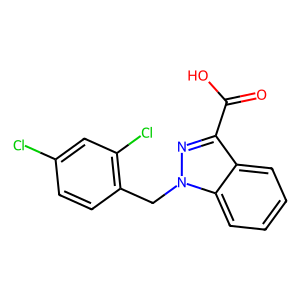

In [19]:

from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Example: Visualizing a molecule from a SMILES string
print(f"Title: {title}")
smiles_string = smiles
molecule = Chem.MolFromSmiles(smiles_string)

# Generate the image using RDKit
image = Draw.MolToImage(molecule)

# Display the image directly in the Jupyter Notebook
display(image)


## 4. DeepSynergy Model Training and Evaluation Framework <a name="training"></a>


In this section, we'll train the `DeepSynergy` model, designed specifically for drug pair scoring based on contextual and drug features.


## 4.1. Setting up Data for Model Training <a name="settingup"></a>

In this section, we will prepare our dataset for the machine learning model. This involves:

1. **Splitting the Data**: We'll divide our data into training and testing sets. This is essential for evaluating the model's performance objectively.
2. **Creating Batch Generator**: We'll set up a batch generator that will feed data to the model in batches during training. This helps in managing memory efficiently and can speed up the training process.
   - The generator will use both context features and drug features but will not include the molecular graph representations for drugs.

By setting up our data this way, we ensure that the model can learn from a portion of the data (training set) and then validate its learning on a completely separate set of data (testing set).


In [20]:
# Splitting the data into training and testing sets with a 70% split
train, test = triples.train_test_split(train_size=0.7)

# Initializing the BatchGenerator with a specific batch size and feature inclusion settings
train_generator  = BatchGenerator(batch_size=1024,            # Number of samples per batch
                           context_features=True,      # Include context features in the batch
                           drug_features=True,         # Include drug features in the batch
                           drug_molecules=False,       # Do not include drug molecule data in the batch
                           context_feature_set=context_set,  # Providing the context features set
                           drug_feature_set=drug_set,        # Providing the drug features set
                           labeled_triples=train)            # Use the training data for generating batches

# Setting up a separate generator for test data
test_generator = BatchGenerator(
    batch_size=1024,
    context_features=True,
    drug_features=True,
    drug_molecules=False,
    context_feature_set=context_set,
    drug_feature_set=drug_set,
    labeled_triples=test  # This time using the test split
)


## 4.2. Model Training <a name="modeltraining"></a>


1. **Model Initialization**: Setting up the `DeepSynergy` model with specific channel sizes for context and drug features.
2. **Optimizer Setup**: Configuring the Adam optimizer, which is commonly used due to its efficiency in handling sparse gradients and adaptive learning rate capabilities.
3. **Training Loop**: Iterating over batches of data, where for each batch, we:
   - Compute predictions from the model.
   - Calculate the loss using binary cross-entropy, which is suitable for binary classification tasks like drug pair scoring.
   - Perform backpropagation to update the model's weights.

This training approach will help the model learn to predict interactions effectively, optimizing its parameters to minimize prediction error over training epochs.


In [36]:
import torch
from chemicalx.models import DeepSynergy

# Initializing the DeepSynergy model with specified number of channels for context and drug features.
model = DeepSynergy(context_channels=112,  # Number of features per context.
                    drug_channels=256)  # Number of features per drug.

In [37]:
print(model)

DeepSynergy(
  (final): Sequential(
    (0): Linear(in_features=624, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=32, out_features=1, bias=True)
    (8): Sigmoid()
  )
)


In [38]:
import torch
from chemicalx.models import DeepSynergy
import matplotlib.pyplot as plt

import torch
from chemicalx.models import DeepSynergy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Setup
optimizer = torch.optim.Adam(model.parameters())
loss_function = torch.nn.BCELoss()
num_epochs = 100
patience = 10  # Number of epochs to wait for improvement before stopping
best_loss = float('inf')
best_auc = float('-inf')  # To track the best AUC
patience_counter = 0

# Lists to store loss and AUC history
training_loss_history = []
test_loss_history = []
test_auc_history = []

# Main training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    batch_losses = []
    for batch in train_generator:
        optimizer.zero_grad()
        prediction = model(batch.context_features, batch.drug_features_left, batch.drug_features_right)
        loss = loss_function(prediction, batch.labels)
        batch_losses.append(loss.item())
        loss.backward()
        optimizer.step()

    training_loss = sum(batch_losses) / len(batch_losses)
    training_loss_history.append(training_loss)

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    test_losses = []
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch in test_generator:
            prediction = model(batch.context_features, batch.drug_features_left, batch.drug_features_right)
            loss = loss_function(prediction, batch.labels)
            test_losses.append(loss.item())
            all_predictions.extend(prediction.detach().cpu().numpy())
            all_labels.extend(batch.labels.detach().cpu().numpy())

    test_loss = sum(test_losses) / len(test_losses)
    test_loss_history.append(test_loss)
    try:
        test_auc = roc_auc_score(all_labels, all_predictions)
        test_auc_history.append(test_auc)
    except ValueError:
        print("ROC AUC couldn't be calculated - possibly due to only one class present in test set.")
    
    
    # Print out losses and AUC for each epoch
    print(f"Epoch {epoch+1}: Training Loss = {training_loss:.4f}, Test Loss = {test_loss:.4f}, Test AUC = {test_auc:.4f}")

    # Early stopping check
    if test_loss < best_loss:
        best_loss = test_loss
        best_model = model.state_dict()  # Save the best model
        patience_counter = 0  # Reset the patience counter
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break



# Load the best model
#model.load_state_dict(best_model)



Epoch 1: Training Loss = 0.5768, Test Loss = 0.5309, Test AUC = 0.7326
Epoch 2: Training Loss = 0.5264, Test Loss = 0.5044, Test AUC = 0.7653
Epoch 3: Training Loss = 0.5023, Test Loss = 0.4886, Test AUC = 0.7857
Epoch 4: Training Loss = 0.4857, Test Loss = 0.4749, Test AUC = 0.7999
Epoch 5: Training Loss = 0.4727, Test Loss = 0.4704, Test AUC = 0.8065
Epoch 6: Training Loss = 0.4634, Test Loss = 0.4611, Test AUC = 0.8112
Epoch 7: Training Loss = 0.4566, Test Loss = 0.4573, Test AUC = 0.8172
Epoch 8: Training Loss = 0.4500, Test Loss = 0.4517, Test AUC = 0.8198
Epoch 9: Training Loss = 0.4435, Test Loss = 0.4555, Test AUC = 0.8205
Epoch 10: Training Loss = 0.4390, Test Loss = 0.4502, Test AUC = 0.8247
Epoch 11: Training Loss = 0.4354, Test Loss = 0.4501, Test AUC = 0.8238
Epoch 12: Training Loss = 0.4309, Test Loss = 0.4480, Test AUC = 0.8257
Epoch 13: Training Loss = 0.4278, Test Loss = 0.4468, Test AUC = 0.8281
Epoch 14: Training Loss = 0.4251, Test Loss = 0.4495, Test AUC = 0.8272
E

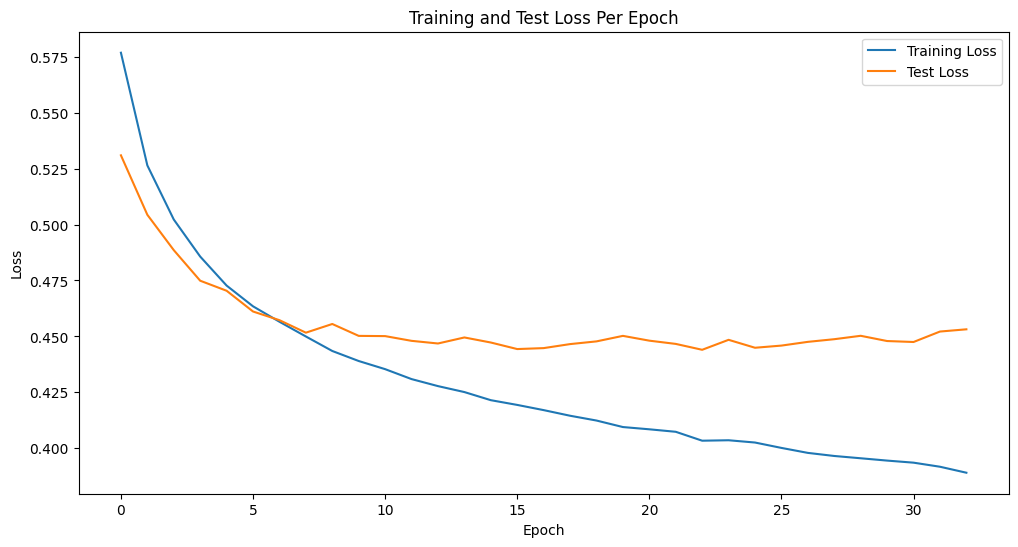

In [39]:
# Plotting training and test loss history
plt.figure(figsize=(12, 6))
plt.plot(training_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.title('Training and Test Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

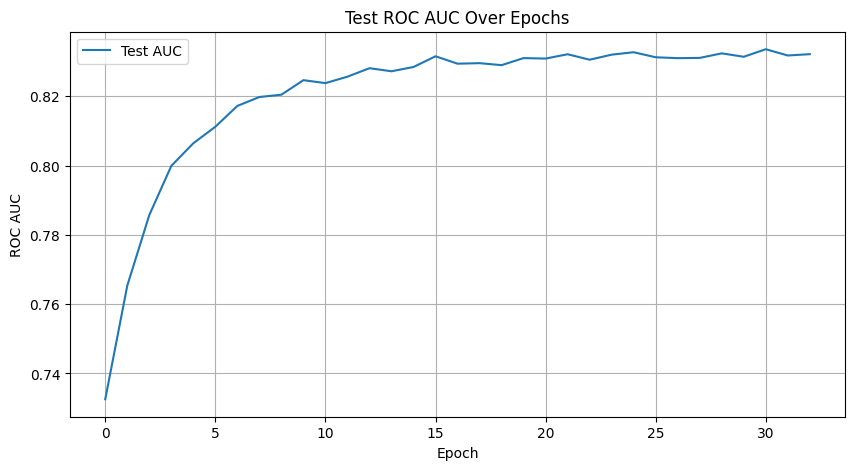

In [40]:
# Plotting AUC history
plt.figure(figsize=(10, 5))
plt.plot(test_auc_history, label='Test AUC')
plt.title('Test ROC AUC Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid(True)
plt.show()

## 4.3. Model Evaluation and Prediction Collection  <a name="eval"></a>


After training the `DeepSynergy` model, we now switch to the evaluation phase to assess its performance on the test dataset. Here's what we'll do:

1. **Switch to Evaluation Mode**: This disables certain layers like dropout or batch normalization that behave differently during training and testing, ensuring our evaluations are consistent.

2. **Set Test Data**: We update the generator to use the test dataset for generating predictions. This ensures that the model is evaluated only on previously unseen data.

3. **Collect Predictions**: We iterate over each batch from the test dataset, compute predictions, and store them along with their identifiers. This allows us to analyze the model's performance in detail. The process for collecting these predictions is as follows:


In [57]:
import pandas as pd

predictions = []

for batch in test_generator:
    with torch.no_grad():
        # Obtain predictions from the model
        prediction = model(batch.context_features, batch.drug_features_left, batch.drug_features_right)
        prediction = prediction.detach().cpu().numpy()

        # Create a DataFrame from identifiers and true labels
        identifiers = pd.DataFrame(batch.identifiers)
        identifiers['prediction'] = prediction.flatten()

        true_labels = batch.labels.detach().cpu().numpy()  # Detach and move to CPU, convert to numpy
        #identifiers['true_labels'] = true_labels  # Add true labels to the DataFrame

        predictions.append(identifiers)

# Concatenate all the predictions into a single DataFrame
predictions_df = pd.concat(predictions, ignore_index=True)

# Now `predictions_df` holds all your predictions along with identifiers


In [324]:
print(predictions_df)

         drug_1    drug_2   context  label  prediction  binary_prediction
0        448812      1986     KBM-7    0.0    0.064357                  0
1         32874      3385    SNB-75    0.0    0.489506                  0
2      15953832   5329102     CAOV3    0.0    0.712833                  1
3          4114     60699      A549    0.0    0.017391                  0
4        123608      3690    BT-549    0.0    0.049685                  0
...         ...       ...       ...    ...         ...                ...
57413   6450551    123631   SK-OV-3    1.0    0.879783                  1
57414    448812      5578     KBM-7    0.0    0.432961                  0
57415      5920     91649     KBM-7    0.0    0.578133                  1
57416    208908  24964624  NCI-H460    0.0    0.648848                  1
57417    216326     36314    UACC62    0.0    0.004302                  0

[57418 rows x 6 columns]


In [60]:
from sklearn.metrics import roc_auc_score

# Assume 'true_labels' column in predictions_df contains the actual labels
auc_score = roc_auc_score(predictions_df['label'], predictions_df['prediction'])
print(f"ROC-AUC Score: {auc_score}")


ROC-AUC Score: 0.8321768534079467


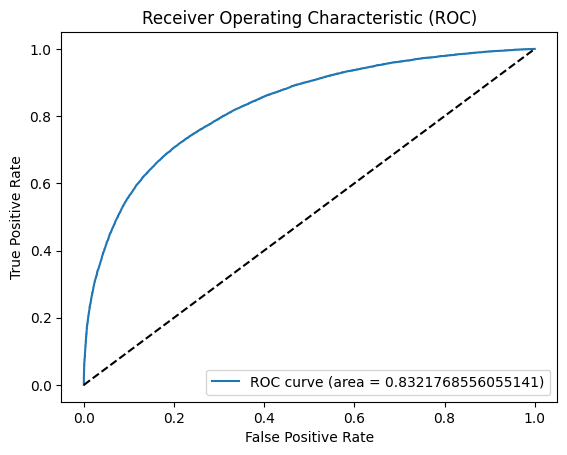

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(predictions_df['label'], predictions_df['prediction'])
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 4.4 Conclusion of Model Evaluation <a name="4conclusion"></a>



We have now completed a comprehensive cycle of model training, prediction, and evaluation. Our detailed analysis, utilizing both binary and continuous outputs, has enabled us to understand the strengths and limitations of the `DeepSynergy` model within our testing framework. By utilizing ROC AUC evaluations and optimizing our classification threshold, we've gained valuable insights into the model's predictive performance.


Next, we will explore another powerful feature of the ChemicalX library: pipelines. Pipelines in ChemicalX allow for streamlined execution of complex workflows, integrating various stages of drug interaction modeling. This feature simplifies the process of setting up, training, and evaluating models by encapsulating these tasks into configurable components. The use of pipelines ensures that our modeling approach is not only reproducible but also scalable, accommodating the incorporation of additional features or new types of data seamlessly.



## 5. Integrating and Comparing ChemicalX Pipelines with Manual Pipelines <a name="5pipelines"></a>

In the field of drug interaction modeling, researchers have the option to use established frameworks like ChemicalX or to develop their own manual pipelines. Both approaches have their merits and can be chosen based on the project's needs. This section will guide you through using a ChemicalX pipeline, setting up a manual pipeline, and subsequently comparing the outcomes of both to determine which might be more suitable for specific types of drug interaction studies.



## 5.1 Manual pipelines <a name="5.1pipelines"></a>


Manual pipelines provide flexibility and control, allowing researchers to customize each step accoHere’s how you could set up a manual pipeline for drug interaction modeling:



### Customizing Training and Evaluation Processes

By refining the established processes for training and evaluation, you can create your own tailored pipeline that fits specific project needs. This approach allows for more control over each step of the modeling process and the flexibility to adjust parameters according to the requirements of the data and the desired outcomes.

### Defining the Manual Pipeline Function

The function `manual_pipeline` is designed to take several parameters that define how the model should be trained and evaluated. Here's a breakdown of what each parameter represents:

- **model**: The machine learning model to be used for training.
- **dataset**: The dataset object that provides access to the drug interactions data.
- **batch_size**: The number of examples the model should see in each training iteration.
- **context_features**: A boolean indicating whether or not to include context features like cell line or genetic information.
- **drug_features**: A boolean specifying if drug-specific features should be utilized.
- **drug_molecules**: A boolean to decide whether molecular data of the drugs should be included.
- **epochs**: The total number of times the training process should iterate through the entire dataset.

In [63]:
def manual_pipeline(model, dataset, batch_size, context_features, drug_features, drug_molecules, epochs):
    optimizer = torch.optim.Adam(model.parameters())
    loss_function = torch.nn.BCELoss()
    patience = 10
    best_loss = float('inf')
    patience_counter = 0

    training_loss_history = []
    test_loss_history = []
    test_auc_history = []

    # Setup generators
    loader = dataset

    context_set = loader.get_context_features()
    drug_set = loader.get_drug_features()
    triples = loader.get_labeled_triples()

    train, test = triples.train_test_split(train_size=0.7)
    train_generator = BatchGenerator(batch_size=batch_size,
                                     context_features=context_features,
                                     drug_features=drug_features,
                                     drug_molecules=drug_molecules,
                                     context_feature_set=context_set,
                                     drug_feature_set=drug_set,
                                     labeled_triples=train)
    test_generator = BatchGenerator(batch_size=batch_size,
                                    context_features=context_features,
                                    drug_features=drug_features,
                                    drug_molecules=drug_molecules,
                                    context_feature_set=context_set,
                                    drug_feature_set=drug_set,
                                    labeled_triples=test)

    # Main training loop
    for epoch in range(epochs):
        model.train()
        batch_losses = []
        for batch in train_generator:
            optimizer.zero_grad()
            prediction = model(batch.context_features, batch.drug_features_left, batch.drug_features_right)
            loss = loss_function(prediction, batch.labels)
            batch_losses.append(loss.item())
            loss.backward()
            optimizer.step()

        training_loss = sum(batch_losses) / len(batch_losses)
        training_loss_history.append(training_loss)

        # Test loss and AUC calculation
        model.eval()
        test_losses = []
        all_predictions = []
        all_labels = []
        with torch.no_grad():
            for batch in test_generator:
                prediction = model(batch.context_features, batch.drug_features_left, batch.drug_features_right)
                loss = loss_function(prediction, batch.labels)
                test_losses.append(loss.item())

                all_predictions.extend(prediction.detach().cpu().numpy())
                all_labels.extend(batch.labels.detach().cpu().numpy())

        test_loss = sum(test_losses) / len(test_losses)
        test_loss_history.append(test_loss)
        try:
            test_auc = roc_auc_score(all_labels, all_predictions)
            test_auc_history.append(test_auc)
        except ValueError:
            print("ROC AUC couldn't be calculated - possibly due to only one class present in test set.")

        # Early stopping check
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break

    # Load the best model
    model.load_state_dict(best_model)


    return training_loss_history, test_loss_history, test_auc_history

I will also define a function to help plotting the test loss, the train loss and the ROC Curve

In [64]:
def plotting_loss_and_AUC(training_loss_history,test_loss_history,test_auc_history):
    # Plot losses and AUC
    plt.figure(figsize=(12, 6))
    plt.plot(training_loss_history, label='Training Loss')
    plt.plot(test_loss_history, label='Test Loss')
    plt.title('Training and Test Loss Per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    if test_auc_history:
        plt.figure(figsize=(12, 6))
        plt.plot(test_auc_history, label='Test ROC AUC')
        plt.title('Test ROC AUC Per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('ROC AUC')
        plt.legend()
        plt.show()
        



### Considerations for Manual Pipelines
- **Customization**: Manual pipelines allow for deeper customization and fine-tuning of the modeling processes. Researchers can modify every aspect of the pipeline to fit specific needs, which is particularly useful for novel or complex models that require specialized handling.
- **Transparency and Control**: Building your pipeline gives you complete visibility and control over the data flows and modeling steps, which can be crucial for debugging, improving model performance, or meeting specific research requirements.
- **Learning and Adaptation**: Manually creating and managing pipelines can provide valuable insights into the machine learning workflow, offering opportunities to identify and implement improvements specific to the task at hand.



#### Now we can use the pipeline from `chemicalx` to compare the two pipelines. We will create first a function to compare the results form the two pipelines.



In [65]:
def compare_results(manual_results, chemicalx_results):
    # Assuming manual_results and chemicalx_results contain training and test losses
    _, manual_test_losses, test_auc_history = manual_results
    print("AUC for Manual Pipeline:", max(test_auc_history))
    
    chemicalx_pipeline_results = chemicalx_results

    chemicalx_test_losses = chemicalx_pipeline_results.losses

    
    print("AUC for ChemicalX Pipeline:", (chemicalx_pipeline_results.summarize()))

    # Plotting the testing losses
    plt.figure(figsize=(12, 6))
    plt.plot(manual_test_losses, label='Manual Test Loss', linewidth=2)
    plt.plot(chemicalx_test_losses, label='ChemicalX Test Loss', alpha=0.5)  # Reduced opacity for ChemicalX
    plt.title('Comparison of Test Losses Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)  # Adding grid lines for better readability
    plt.show()

    

In [67]:
from chemicalx import pipeline

# Define the experiment parameters
params = {
    'model': DeepSynergy(context_channels=112, drug_channels=256),
    'dataset': DrugCombDB(),
    'batch_size': 1024,
    'context_features': True,
    'drug_features': True,
    'drug_molecules': False,
    'epochs': 100
}

# Run manual pipeline
manual_results = manual_pipeline(**params)

# Run ChemicalX pipeline
chemicalx_results = pipeline(**params)



Early stopping triggered after 35 epochs


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:30<00:00,  1.11it/s]


AUC for Manual Pipeline: 0.8373436892189446
Metric       Value
--------  --------
roc_auc   0.843737
AUC for ChemicalX Pipeline: None


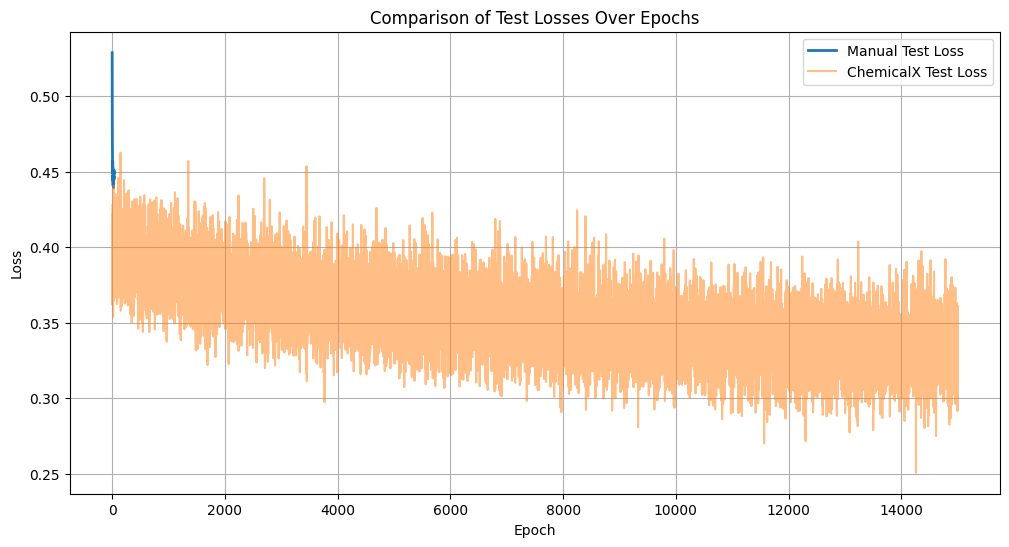

In [69]:
# Compare results
compare_results(manual_results, chemicalx_results)


### 5.2. Conclusion on pipelines <a name="5.2pipelines"></a>



The ChemicalX pipeline offers a high degree of flexibility with easy configurability for switching between different optimizers and parameters through its interface, allowing for quick experimentation and simplified management of device settings. It automates many aspects of the training process, such as batch and epoch handling, making it ideal for standard tasks and rapid prototyping.

In contrast, the manual pipeline setup provides direct and explicit control over every aspect of the training process, from optimizer configuration and learning rate adjustments to detailed epoch management. This setup is particularly suited for complex or specialized tasks that require custom training routines and precise parameter tuning, offering greater granularity and customization at the cost of increased complexity and manual management.

## 6. Comparative Analysis of Different Models <a name="6compa"></a>

4.1. Setting up Data for Model Training <a name="settingup"></a>
4.2. Model Training <a name="modeltraining"></a>
4.3. Model Evaluation and Prediction Collection  <a name="eval"></a>
4.4 Conclusion of Model Evaluation <a name="4conclusion"></a>
5. Integrating and Comparing ChemicalX Pipelines with Manual Pipelines <a name="5pipelines"></a>
5.1 Manual pipelines <a name="5.1pipelines"></a>
5.2. Conclusion on pipelines <a name="5.2pipelines"></a>
6. Comparative Analysis of Different Models <a name="6compa"></a>


In this section, we'll conduct a comprehensive evaluation of various models, including DeepDrug, DeepSynergy, MatchMaker, and DeepDDI, utilizing the ChemicalX pipeline. This analysis aims to determine which model performs best under standardized conditions provided by the pipeline.

### Goals of the Model Comparison:

- **Performance Evaluation**: We will assess the predictive performance of each model using key metrics such as ROC AUC scores, which help measure the models' ability to distinguish between classes effectively.
- **Loss and Convergence**: Analyze how each model's loss progresses over training epochs to understand their learning stability and speed of convergence.
- **Generalization to Unseen Data**: Compare the performance of the models on the test dataset to gauge their generalization capabilities, a critical factor in real-world applications.

By aligning all models within the same pipeline configuration, we ensure a fair comparison by minimizing external variabilities and focusing solely on the models' inherent capabilities. The results of this analysis will guide our choice of the optimal model for further development and deployment in drug interaction prediction tasks.


In [112]:
def run_experiment(model_class, params):
    # Initialize the model with specific parameters
    model = model_class(**params['model_params'])

    # Setup parameters for running the pipeline
    dataset_params = {
        'dataset': 'DrugCombDB',  # Assuming this resolves to a valid dataset object
        'batch_size': 1024,
        'context_features': True,
        'drug_features': True,
        'drug_molecules': False,
        'epochs': 100,
        'train_size': 0.8,  # 80% of data used for training
        'random_state': 42,  # Fixed seed for consistency
    }
    dataset_params.update(params['dataset_params'])
    
    # Setup additional pipeline parameters
    pipeline_params = {
        'model': model,
        'optimizer_cls': torch.optim.Adam,
        'loss_cls': torch.nn.BCELoss,
        'metrics': ['roc_auc'],  # Example metric
    }
    
    # Combine dataset and pipeline parameters
    pipeline_params.update(dataset_params)

    # Run the pipeline with the combined parameters
    return pipeline(**pipeline_params)

# Define configurations for each model
model_configs = {
    'DeepSynergy': {'model_params': {'context_channels': 112, 'drug_channels': 256}, 'dataset_params': {}},
    'MatchMaker': {'model_params': {'context_channels': 112, 'drug_channels': 256}, 'dataset_params': {}},
    'DeepDDI': {'model_params': {'drug_channels': 256, 'hidden_channels': 128}, 'dataset_params': {}},
}

# Dictionary to hold results
results = {}

# Run experiments for each model configuration
for model_name, config in model_configs.items():
    # Use the imported models module to get the model class
    model_class = getattr(chemicalx.models, model_name)
    results[model_name] = run_experiment(model_class, config)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:32<00:00,  3.32s/it]


In [113]:
# Output results for each model
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(result.metrics)

Results for DeepSynergy:
{'roc_auc': 0.8290635874478129}
Results for MatchMaker:
{'roc_auc': 0.7840931187417274}
Results for DeepDDI:
{'roc_auc': 0.739296394703137}


## 6.1 Neural Network Architectures

Before continuing with the analysis let's explore the different architerus of this models

In [240]:
print(results["DeepSynergy"].model)

DeepSynergy(
  (final): Sequential(
    (0): Linear(in_features=624, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=32, out_features=1, bias=True)
    (8): Sigmoid()
  )
)


In [241]:
print(results["DeepDDI"].model)

DeepDDI(
  (final): Sequential(
    (0): Linear(in_features=512, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=None, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(128, eps=1e-05, momentum=None, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=None, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(128, eps=1e-05, momentum=None, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): ReLU()
    (18): BatchNorm1d(128, eps=1e-05, momentum=None, affine=True, track_running_stats=True)
    (19): ReLU()
    (20): Linear(in_features=128,

In [242]:
print(results["MatchMaker"].model)

MatchMaker(
  (drug_context_layer): Sequential(
    (0): Linear(in_features=368, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=32, bias=True)
  )
  (final): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
    (4): Sigmoid()
  )
)


### 6.1.1 Comparative Analysis of Neural Network Architectures

### DeepSynergy
- **Input Features:** 624
- **Architecture:** Sequential network with three linear layers each followed by ReLU and a final dropout layer to prevent overfitting.
- **Output:** Ends with a sigmoid for binary classification.
- **Regularization:** Dropout (p=0.5).

### DeepDDI
- **Input Features:** 512
- **Architecture:** Complex structure with multiple layers, including linear transformations, ReLU activations, and extensive use of Batch Normalization.
- **Output:** Ends with a sigmoid activation for binary classification.
- **Regularization:** Batch Normalization after nearly every layer.

### MatchMaker
- **Input Features:** 368 initially, combined features likely reduced to 64.
- **Architecture:** Two sequential blocks; initial block processes with linear layers and Dropout, followed by a final block that prepares the output.
- **Output:** Ends with a sigmoid for binary classification.
- **Regularization:** Uses Dropout in both initial and final processing stages.

### Observations
- **Complexity and Depth:** DeepDDI is the most complex, suggesting suitability for larger datasets. MatchMaker and DeepSynergy are simpler, potentially better for smaller datasets.
- **Regularization Techniques:** DeepDDI uses Batch Normalization extensively, while MatchMaker and DeepSynergy rely on Dropout.
- **Feature Processing:** MatchMaker uniquely employs a segmented approach to combine drug and context features effectively.

## 6.2 Model Training Loss and ROC_AUC <a name="6.2compa"></a>



Continuing with the output results for each model, let's print the ROC AUC value for each model and their corresponding losses


In [114]:

data = []
for model_name, result in results.items():
    data.append({'Model': model_name, 'ROC AUC': result.metrics['roc_auc']})

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

         Model   ROC AUC
0  DeepSynergy  0.829064
1   MatchMaker  0.784093
2      DeepDDI  0.739296


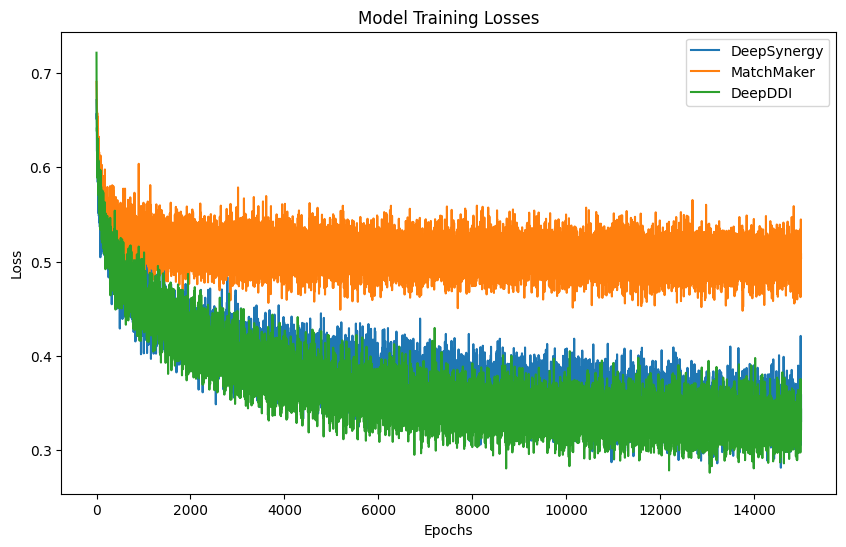

In [115]:
# Plotting
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    plt.plot(result.losses, label=model_name)

plt.title('Model Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6.3 Predictive Model Performance <a name="6.3compa"></a>



In this section, we compare the prediction performance of each model. We use a correlation matrix to see how well their predictions align.


In [130]:
df_models_pred = []
# Output results for each model
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(result.predictions)
    df_models_pred.append(result.predictions)


Results for DeepSynergy:
          drug_1     drug_2     context  label  prediction
180886   3085106   54611422      IGROV1    0.0    0.007569
181612      2708   54611422        KM12    0.0    0.001281
55194    5360373     104741    NCI-H522    0.0    0.038584
189494  11964036   46907787        TMD8    1.0    0.961043
54976     123608       4114    HCC-2998    0.0    0.366232
...          ...        ...         ...    ...         ...
27080      92721   54675769       KBM-7    0.0    0.930089
73824    3062316  135401907  MDA-MB-231    0.0    0.012428
159032    452548       2478      UACC62    0.0    0.011927
130001     60198     439525     RXF 393    1.0    0.995152
12482    3062316   11977753    RPMI7951    1.0    0.998898

[38279 rows x 5 columns]
Results for MatchMaker:
          drug_1    drug_2    context  label  prediction
138084      3950   2733525     SNB-75    0.0    0.228177
187831      5035     32874  NCI-H322M    1.0    0.517734
17984   24964624    176870      CAOV3    0.0  


### Next Steps

To further refine our model selection and improve performance, we could:
- Implement hyperparameter optimization techniques such as grid search or Bayesian optimization to fine-tune each model's settings.
- Explore advanced regularization methods or alternative optimization algorithms to address the observed fluctuations and plateaus in training losses.
- Conduct a thorough error analysis to identify specific data points or features that may be impacting model performance negatively.

This analysis not only guides our model optimization efforts but also assists in making informed decisions about which model to deploy based on their learning characteristics and stability over prolonged training.


In [131]:
df_pred_deepsynergy, df_pred_matchmaker, df_pred_DeepDDI = df_models_pred[0], df_models_pred[1], df_models_pred[2]

In [144]:
merged_df_pred = df_pred_deepsynergy.merge(df_pred_matchmaker, left_index=True, right_index=True, suffixes=('', '_MatchMaker'), how='inner')

merged_df_pred.drop(['drug_1_MatchMaker', 'drug_2_MatchMaker', 'context_MatchMaker', 'label_MatchMaker'], axis=1, inplace=True)
merged_df_pred = merged_df_pred.merge(df_pred_DeepDDI, left_index=True, right_index=True, suffixes=('', '_DeepDDI'), how='inner')
merged_df_pred.drop(['drug_1_DeepDDI', 'drug_2_DeepDDI', 'context_DeepDDI', 'label_DeepDDI'], axis=1, inplace=True)

merged_df_pred.rename(columns = {"prediction":"prediction_DeepSynergy"}, inplace=True)

In [145]:
merged_df_pred

,drug_1,drug_2,context,label,prediction_DeepSynergy,prediction_MatchMaker,prediction_DeepDDI
180886,3085106,54611422,IGROV1,0.0,0.007569,0.205253,3.148151e-17
181612,2708,54611422,KM12,0.0,0.001281,0.067292,1.798276e-06
55194,5360373,104741,NCI-H522,0.0,0.038584,0.171727,0.000000e+00
189494,11964036,46907787,TMD8,1.0,0.961043,0.906389,1.760020e-04
54976,123608,4114,HCC-2998,0.0,0.366232,0.087653,2.095347e-01
...,...,...,...,...,...,...,...
27080,92721,54675769,KBM-7,0.0,0.930089,0.185562,2.644438e-03
73824,3062316,135401907,MDA-MB-231,0.0,0.012428,0.180355,1.272100e-07
159032,452548,2478,UACC62,0.0,0.011927,0.129577,2.695383e-03
130001,60198,439525,RXF 393,1.0,0.995152,0.235452,1.000000e+00


In [146]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Calculate metrics for each model
metrics = {}
for model in ['DeepSynergy', 'MatchMaker', 'DeepDDI']:
    y_true = merged_df_pred['label']
    y_pred = merged_df_pred[f'prediction_{model}'] > 0.5  # Example threshold, adjust as needed
    metrics[model] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, merged_df_pred[f'prediction_{model}']),
        'F1 Score': f1_score(y_true, y_pred)
    }

In [147]:
metrics

{'DeepSynergy': {'Accuracy': 0.7970950129313723,
  'ROC AUC': 0.8290635874478129,
  'F1 Score': 0.598791259879126},
 'MatchMaker': {'Accuracy': 0.7721727317850519,
  'ROC AUC': 0.7840931187417274,
  'F1 Score': 0.4912198821539},
 'DeepDDI': {'Accuracy': 0.7498367250973118,
  'ROC AUC': 0.739296394703137,
  'F1 Score': 0.5117275137670814}}

### 6.3.1 Correlation Matrix

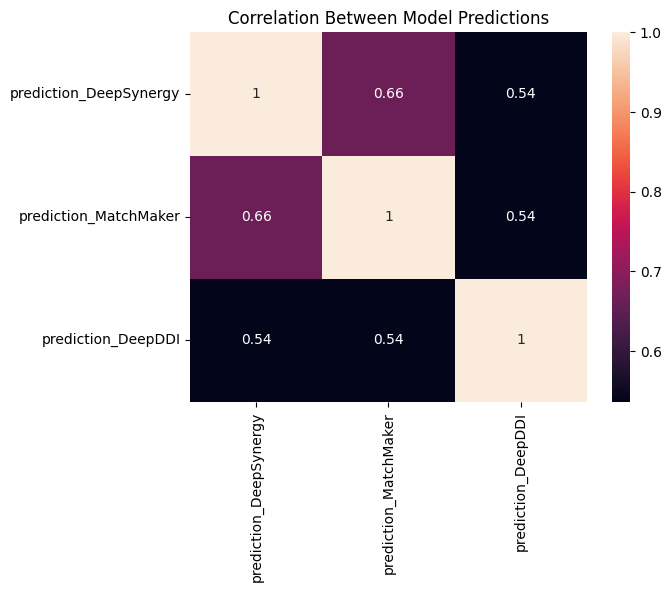

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = merged_df_pred[[f'prediction_DeepSynergy', f'prediction_MatchMaker', f'prediction_DeepDDI']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Between Model Predictions')
plt.show()


### 6.3.2. Correlation Analysis

### High Correlation
- **DeepSynergy and MatchMaker (0.663373):** 
  - This suggests a significant alignment in their predictions, indicating that both models often agree on the likelihood of drug interaction. This similarity could be due to similar features or modeling techniques influencing their predictions.

### Moderate Correlation
- **DeepSynergy and DeepDDI (0.537885):** 
  - The moderate correlation here indicates that while there is some level of agreement, DeepDDI often provides a somewhat distinct prediction compared to DeepSynergy. This might be indicative of DeepDDI capturing different aspects or utilizing different features.
- **MatchMaker and DeepDDI (0.536291):** 
  - Similarly, the moderate correlation between MatchMaker and DeepDDI suggests that DeepDDI offers unique insights which might not be completely aligned with MatchMaker's predictions.


### 6.3.3 Precision and Recall Analysis 
The below plots display the precision and recall curves for three different predictive models (DeepSynergy, MatchMaker, and DeepDDI) across varying thresholds. For DeepSynergy, the precision starts high and decreases as the threshold increases, while recall starts low and improves, crossing at around 0.6. MatchMaker exhibits an initial increase in precision with a decreasing recall as the threshold increases, showing a critical change in behavior near a 0.5 threshold. DeepDDI's plot reveals a dramatic change in both precision and recall at lower thresholds, with precision peaking sharply near a 0.2 threshold before stabilizing. These curves highlight the trade-offs between precision and recall for each model, assisting in selecting an optimal threshold based on the specific needs of accuracy (precision) versus coverage (recall) in drug interaction predictions.

- DeepSynergy: Shows a classic inverse relationship between precision and recall, typical in models where increasing the certainty of positive predictions (precision) reduces the overall detection of positives (recall).


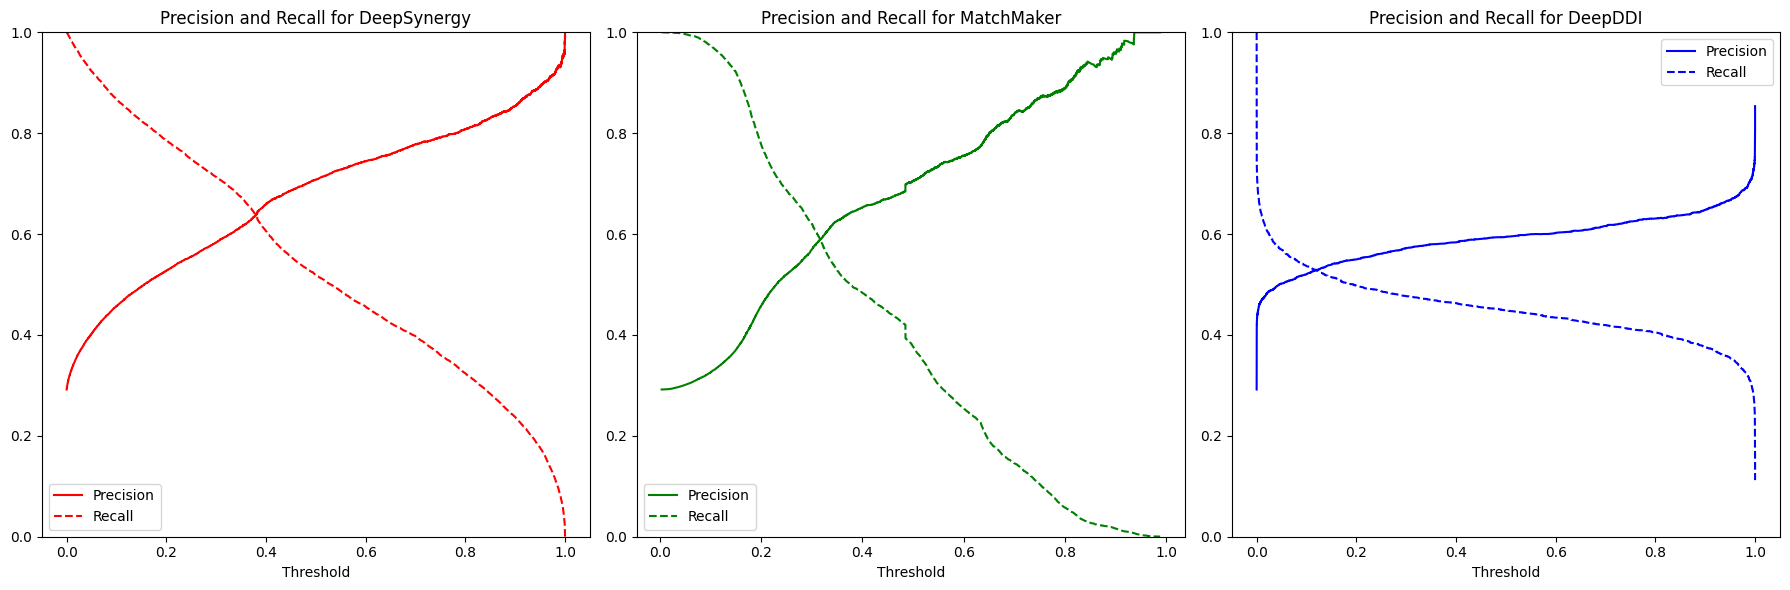

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Prepare your data
models = ['DeepSynergy', 'MatchMaker', 'DeepDDI']
colors = ['r', 'g', 'b']  # Assign different colors for clarity

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each model and plot in a subplot
for ax, model, color in zip(axes, models, colors):
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(merged_df_pred['label'], merged_df_pred[f'prediction_{model}'])
    
    # Plot precision and recall for the model
    ax.plot(thresholds, precision[:-1], f'{color}-', label='Precision')
    ax.plot(thresholds, recall[:-1], f'{color}--', label='Recall')  # Dashed line for recall
    ax.set_title(f'Precision and Recall for {model}')
    ax.set_xlabel('Threshold')
    ax.set_ylim([0, 1])  # Ensure y-axis is the same scale for all subplots
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 6.4. Saving the best model <a name="6.4compa"></a>



For later use we'll save the best model

In [237]:
results["MatchMaker"].model

MatchMaker(
  (drug_context_layer): Sequential(
    (0): Linear(in_features=368, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=32, out_features=32, bias=True)
  )
  (final): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [188]:
best_model = results["DeepSynergy"].model

# Save the model to disk
torch.save(best_model.state_dict(), 'best_model.pth')

# save the entire model (not just the state_dict):
torch.save(best_model, 'complete_best_model.pth')

## 6.5 Conclusion of Comparison <a name="6.5compa"></a>



In conclusion, after comparing the performance metrics across the three models—DeepSynergy, MatchMaker, and DeepDDI—DeepSynergy demonstrated the best overall performance. This decision is based on the precision and recall curves analyzed, where DeepSynergy showed a favorable balance between precision and recall, making it the most suitable model for our purposes. The analysis revealed that DeepSynergy not only maintains a relatively high precision at higher recall levels compared to the other models but also exhibits a more consistent performance across different thresholds. Therefore, we will proceed with DeepSynergy for our further drug interaction predictions, expecting it to deliver reliable and accurate results.


## 7. Practical Application: Case Study in Cancer Drug Interactions <a name="7app"></a>


Thus far, our analysis has focused on evaluating and comparing predictive models without applying them to a practical scenario. In the following section, we will shift our focus towards a real-world application by exploring a use case in cancer treatment. This will involve selecting two specific drugs commonly used in cancer therapy to demonstrate how the DeepSynergy model can be utilized to predict their interaction effects.





## 7.1 Integrating Drug Names and Molecular Structures  <a name="7.1app"></a>

For this application, we will leverage our previously defined function to map drug ids to drug names and their corresponding SMILES notations. SMILES notation provides a way to describe the structure of a chemical species using short ASCII strings.



First, we create a dictionary to store all the data. Then, we generate a unique list of drug IDs, and iterate over them to extract the drug names and their corresponding SMILES.

In [174]:
drug_info_dict = {}  # Dictionary to store drug title and SMILES

all_drug_ids = pd.concat([triples_df['drug_1'], triples_df['drug_2']]).unique()  # Get all unique drug IDs from both columns

for cid in all_drug_ids:
    if cid not in drug_info_dict:
        drug_info_dict[cid] = get_drug_smiles_and_title_from_pubchem(cid)


This dictionary can be seen as a df

In [259]:
drug_info_df = pd.DataFrame.from_dict(drug_info_dict, orient='index', columns=['Drug_Name', 'SMILES'])
drug_info_df.reset_index(inplace=True)
drug_info_df.rename(columns={'index': 'Drug_ID'}, inplace=True)
print(drug_info_df)

       Drug_ID                                          Drug_Name  \
0         3385                                       Fluorouracil   
1     11960529                                          Veliparib   
2     24856436                                        Adavosertib   
3     11977753                                         Dactolisib   
4       387447                                         Bortezomib   
...        ...                                                ...   
1550  73330446                                       CID 73330446   
1551  73330445                                       CID 73330445   
1552  21763506                                      Olesoxime, Z-   
1553  44551660  1-(6,7-dimethoxyquinazolin-4-yl)-3-(pyridin-2-...   
1554  10297043  (R)-6-(4-((4-Ethylpiperazin-1-yl)methyl)phenyl...   

                                                 SMILES  
0                                  C1=C(C(=O)NC(=O)N1)F  
1                   CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N

Let's now merge with the previously defined `triples_df` to extract the Drug Name and the corresponding SMILES.

In [293]:
# Merge to get names and SMILES for drug_1
triples_df_with_info = triples_df.merge(drug_info_df, left_on='drug_1', right_on='Drug_ID', how='left')
triples_df_with_info.rename(columns={'drug_info_df': 'Drug1_Name', 'SMILES': 'Drug1_SMILES'}, inplace=True)
triples_df_with_info.drop('Drug_ID', axis=1, inplace=True)

# Merge to get names and SMILES for drug_2
triples_df_with_info = triples_df_with_info.merge(drug_info_df, left_on='drug_2', right_on='Drug_ID', how='left')
triples_df_with_info.rename(columns={'Drug_Name': 'Drug2_Name', 'SMILES': 'Drug2_SMILES'}, inplace=True)
triples_df_with_info.drop('Drug_ID', axis=1, inplace=True)
print(triples_df_with_info)

          drug_1    drug_2 context  label  \
0           3385  11960529   A2058    1.0   
1           3385  24856436   A2058    1.0   
2           3385  11977753   A2058    1.0   
3           3385    387447   A2058    0.0   
4           3385   3062316   A2058    1.0   
...          ...       ...     ...    ...   
191386  46918825  11598628   A-673    1.0   
191387  68210102  11598628   A-673    0.0   
191388   5281607  11598628   A-673    0.0   
191389    515328  16654980   U-HO1    1.0   
191390   9806229    148198   U-HO1    1.0   

                                              Drug_Name_x  \
0                                            Fluorouracil   
1                                            Fluorouracil   
2                                            Fluorouracil   
3                                            Fluorouracil   
4                                            Fluorouracil   
...                                                   ...   
191386                          

## 7.2 Model Testing Introduction <a name="7.2app"></a>



We are now ready to test our predictive model using a combination of well-known chemotherapy drugs: **Paclitaxel** and **Doxorubicin**. The test will be conducted using the **MCF7** breast cancer cell line to evaluate the interaction effects of these drugs. This setup aims to provide insights into the potential synergistic or antagonistic effects their combination might offer in cancer treatment.


In [263]:
drug1_name = "Paclitaxel"
drug2_name = "Doxorubicin"
cell_line = 'MCF7'

In [318]:
# Filter for Paclitaxel and Doxorubicin
paclitaxel_info = triples_df_with_info[(triples_df_with_info['Drug_Name_x'] == drug1_name) ]
doxorubicin_info = triples_df_with_info[(triples_df_with_info['Drug_Name_x'] == drug2_name)]

# Extracting CID and SMILES 
paclitaxel_smiles = paclitaxel_info[['Drug1_SMILES', 'Drug2_SMILES']].values[0][0]  
doxorubicin_smiles = doxorubicin_info[['Drug1_SMILES', 'Drug2_SMILES']].values[0][0] 

paclitaxel_id = paclitaxel_info[['drug_1']].values[0][0]  
doxorubicin_id = doxorubicin_info[['drug_2']].values[0][0] 
paclitaxel_id

'36314'

Let's graph our molecules

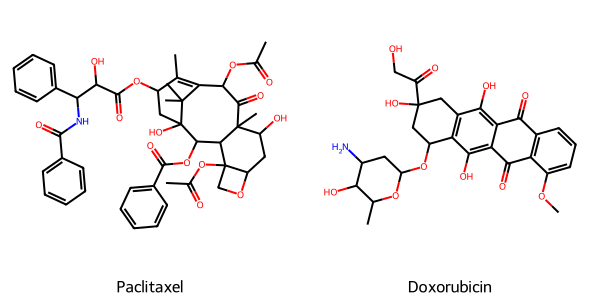

In [319]:

# Create RDKit molecule objects from SMILES
paclitaxel_mol = Chem.MolFromSmiles(paclitaxel_smiles)
doxorubicin_mol = Chem.MolFromSmiles(doxorubicin_smiles)

# Draw molecules
paclitaxel_img = Draw.MolToImage(paclitaxel_mol, size=(500, 500))
doxorubicin_img = Draw.MolToImage(doxorubicin_mol, size=(500, 500))

# Display images (this works in a Jupyter Notebook environment)
Draw.MolsToGridImage([paclitaxel_mol, doxorubicin_mol], molsPerRow=2, subImgSize=(300, 300), legends=['Paclitaxel', 'Doxorubicin'])


And create a dictionary with the information of the molecules

In [320]:
data = {
    'drug_1': [paclitaxel_id],
    'drug_2': [doxorubicin_id],
    'context': [cell_line],
    'label': [np.nan]
}
data = pd.DataFrame(data)


It's neccesary to create a LabeledTriple Object so the model can predict from the data

In [321]:
data_tuples = list(data.itertuples(index=False, name=None))
labeled_triples_pred  = LabeledTriples(data_tuples)


## 7.3 Prediction Test <a name="7.3app"></a>




In this section, we focus on testing the predictive capabilities of our pre-trained `DeepSynergy` model using a specific record of drug molecules: **Paclitaxel** and **Doxorubicin** in the **MCF7** cancer cell line. We manually set up the test data to include features for these drugs and the context of their interaction. This targeted test allows us to assess how the model predicts the interaction effects of this particular drug combination, providing insights into their potential therapeutic synergy.


In [322]:


test_generator_prueba = BatchGenerator(batch_size=1024,
                                       context_features=True,
                                       drug_features=True,
                                       drug_molecules=False,
                                       context_feature_set=context_set,
                                       drug_feature_set=drug_set,
                                       labeled_triples=labeled_triples_pred)

# Load the pre-trained model and set it to evaluation mode
best_model_DeepSynergy = torch.load('complete_best_model.pth')
best_model_DeepSynergy.eval()


# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()


for batch in test_generator_prueba:
    context_features = batch.context_features.to(best_model_DeepSynergy.device)
    drug_features_left = batch.drug_features_left.to(best_model_DeepSynergy.device)
    drug_features_right = batch.drug_features_right.to(best_model_DeepSynergy.device)

    # Prediction
    with torch.no_grad():
        predictions_temp = best_model_DeepSynergy(context_features, drug_features_left, drug_features_right)
        predictions_np = predictions_temp.detach().cpu().numpy()

    # Concatenate predictions with identifiers
    batch_df = batch.identifiers.copy()
    batch_df['Prediction'] = predictions_np.flatten()  # Flatten if predictions are in an array

    # Append to the main results DataFrame
    results_df = pd.concat([results_df, batch_df])

# Reset index after concatenation
results_df.reset_index(drop=True, inplace=True)


In [323]:
results_df

,drug_1,drug_2,context,label,Prediction
0,36314,11960529,MCF7,NaN,0.046288


The prediction of 0.046288 for the drug interaction between Paclitaxel and Doxorubicin in the MCF7 cell line suggests a low likelihood of synergistic interaction according to our model's scale. This result indicates that, under the tested conditions, the combination of these two drugs does not significantly enhance each other's efficacy in this particular cancer cell line. This predictive insight is valuable for guiding further experimental validation and could help refine therapeutic strategies involving these drugs.

## 8. Other functionalities with ChemicalX <a name="8func"></a>



ChemicalX offers versatile functionalities for handling drug interaction data, including the capability to directly load data from a URL. This feature is particularly useful when working with up-to-date datasets hosted online, allowing for seamless integration and analysis without manual downloads. For example, to analyze synergistic and antagonistic interactions, we can directly load a dataset using:


In [225]:
df_Syner_Antag_voting = loader_drugcomb.load_raw_csv_data("http://drugcombdb.denglab.org/download/Syner&Antag_voting.csv")

In [227]:
df_Syner_Antag_voting.describe()

,ID,ZIP,Bliss,Loewe,HSA,ZIPclassification,blissclassification,loeweclassification,hsaclassification,synthetic
count,240976.000000,2.409760e+05,2.409760e+05,240975.000000,240976.000000,240976.000000,240976.000000,240976.000000,240976.000000,240976.000000
mean,120488.500000,1.853389e+01,1.871580e+01,-6.223498,-0.448198,-0.293062,-0.292901,-0.293394,-0.292689,-1.172046
std,69563.923572,4.142303e+03,4.173713e+03,39.838862,40.896043,0.955646,0.955871,0.955813,0.955786,3.822122
min,1.000000,-2.166267e+05,-2.212329e+05,-9663.379000,-11718.486000,-1.000000,-1.000000,-1.000000,-1.000000,-4.000000
25%,60244.750000,-6.730000e+00,-6.680000e+00,-11.630000,-5.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.000000
50%,120488.500000,-2.150000e+00,-2.290000e+00,-4.120000,-1.640000,-1.000000,-1.000000,-1.000000,-1.000000,-4.000000
75%,180732.250000,2.840000e+00,4.060000e+00,2.800000,5.140000,1.000000,1.000000,1.000000,1.000000,4.000000
max,240976.000000,1.444929e+06,1.449994e+06,2696.264000,2169.377000,1.000000,1.000000,1.000000,1.000000,4.000000


## 9. Summary <a name="9summary"></a>


Throughout this exploration, we have demonstrated the capabilities of the ChemicalX library, a powerful tool for analyzing drug interactions. Our journey began with understanding the basic functionalities of the library, including data loading and handling. We progressed to implementing a predictive model, showcasing how ChemicalX can be used to predict the interaction effects between different drug pairs, such as Paclitaxel and Doxorubicin in the MCF7 cancer cell line.

We also explored advanced features, such as loading data directly from a URL, which simplifies the process of keeping our analyses updated with the latest data available. This feature is especially beneficial for ensuring that our research remains relevant and reflects current findings.

In conclusion, ChemicalX has proven to be a good asset in our toolkit for pharmacological research, providing robust tools for both data handling and predictive modeling. It facilitates a deeper understanding of drug interactions, which is crucial for developing more effective therapeutic strategies.
